#### Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm 
# from iterools import Counter
from qumcmc import *

In [2]:
sns.set()

In [3]:
from collections import Counter

In [4]:
# plt.figure(figsize=(10,8))
# for indx in range(1,6):
#     plt.plot(DATA5[indx]['classical']['kldiv'] , label= str(indx))
#     # plt.plot(DATA5[indx]['quantum']['kldiv'] , label= 'quantum')
# plt.xlabel("iterations ")
# plt.ylabel("KL divergence")
# plt.yscale('log')
# plt.title('classical')
# plt.legend()
# plt.show()
# plt.figure(figsize=(10,8))
# for indx in range(1,6):
#     # plt.plot(DATA5[indx]['classical']['kldiv'] , label= str(indx))
#     plt.plot(DATA5[indx]['quantum']['kldiv'] , label= str(indx))
# plt.xlabel("iterations ")
# plt.ylabel("KL divergence")
# plt.yscale('log')
# plt.title('quantum')
# plt.legend()
# plt.show()



In [5]:
def convergence_data_plot(DATA, nspins:int,to_check:str= 'kldiv', init:int =1):
    df_cl = pd.DataFrame(); df_q = pd.DataFrame()
    for i in range(init, DATA.shape[1]+1):
        df_cl[i] = DATA[i]['classical'][to_check]
        df_q[i] = DATA[i]['quantum'][to_check]

    plt.figure(figsize=(10,8))
    plt.plot(df_cl.mean(axis=1), label = 'classical')
    plt.fill_between(range(df_cl.shape[0]),y1=df_cl.mean(axis=1)-0.5*df_cl.std(axis=1),y2=df_cl.mean(axis=1)+0.5*df_cl.std(axis=1), alpha = 0.3)
    plt.plot(df_q.mean(axis=1), label= 'quantum')
    plt.fill_between(range(df_q.shape[0]),y1=df_q.mean(axis=1)-0.5*df_q.std(axis=1),y2=df_q.mean(axis=1)+0.5*df_q.std(axis=1), alpha = 0.4)
    plt.xlabel("Iterations ")
    plt.ylabel("KL divergence")
    plt.yscale('log')
    plt.title('Convergence Data: KL div |'+ ' npsins : '+ str(nspins))
    plt.legend()
    plt.show()


In [17]:
def acceptance_prob_hist(DATA, nspins: int, init:int= 1):

    classical_acp = []; quantum_acp = []
    for i in tqdm(range(init, DATA.shape[1]+1)):
        classical_acp += DATA[i]['classical']['acceptance_prob']
        quantum_acp += DATA[i]['quantum']['acceptance_prob']
    quantum_acp = np.array(quantum_acp); classical_acp = np.array(classical_acp)
    
    
    plt.figure(figsize=(10,10))
    
    result = np.where(quantum_acp > 0.000000000001, quantum_acp, -13)  ### introduce truncation for numerics 
    plt.hist(np.log10(result, out=result, where=result > 0),label= 'quantum enhanced' , alpha= 0.8, bins= 25)
    
    result = np.where(classical_acp > 0.000000000001, classical_acp, -10)   ### introduce truncation for numerics 
    plt.hist(np.log10(result, out=result, where=result > 0),label= 'classical uniform' ,alpha= 0.5, bins= 25)

    plt.xlabel("Acceptance Probabilities | scale: log10")
    plt.legend()
    plt.show()

### **5 qubit**

In [7]:
DATA5 = pd.read_json('SamplingData/DATA_5qubit.json')

#### KL Div

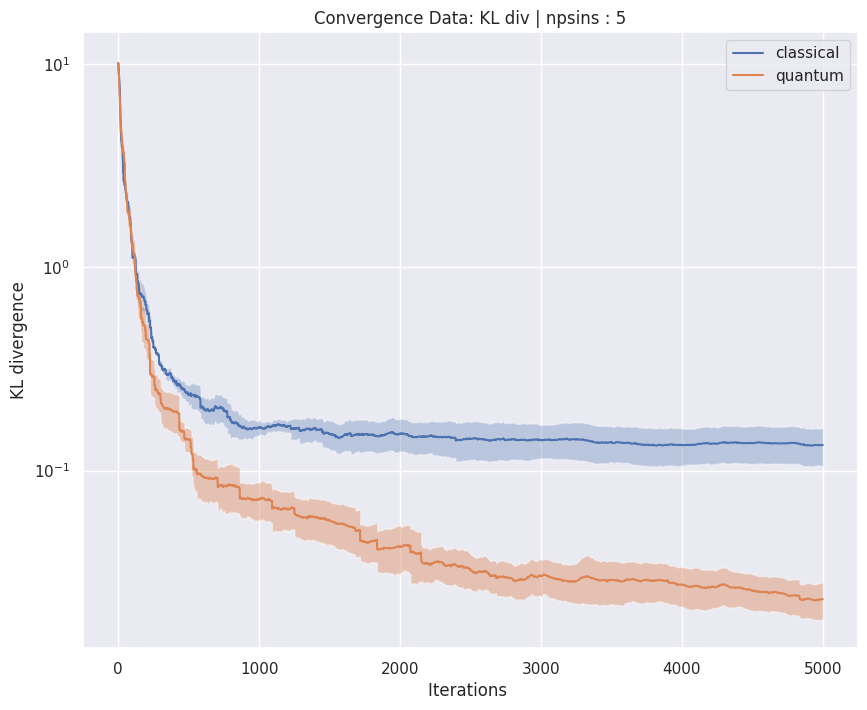

In [8]:
convergence_data_plot(DATA5, to_check='kldiv', nspins= 5)

#### Acceptance Prob

100%|██████████| 5/5 [00:00<00:00, 9515.21it/s]


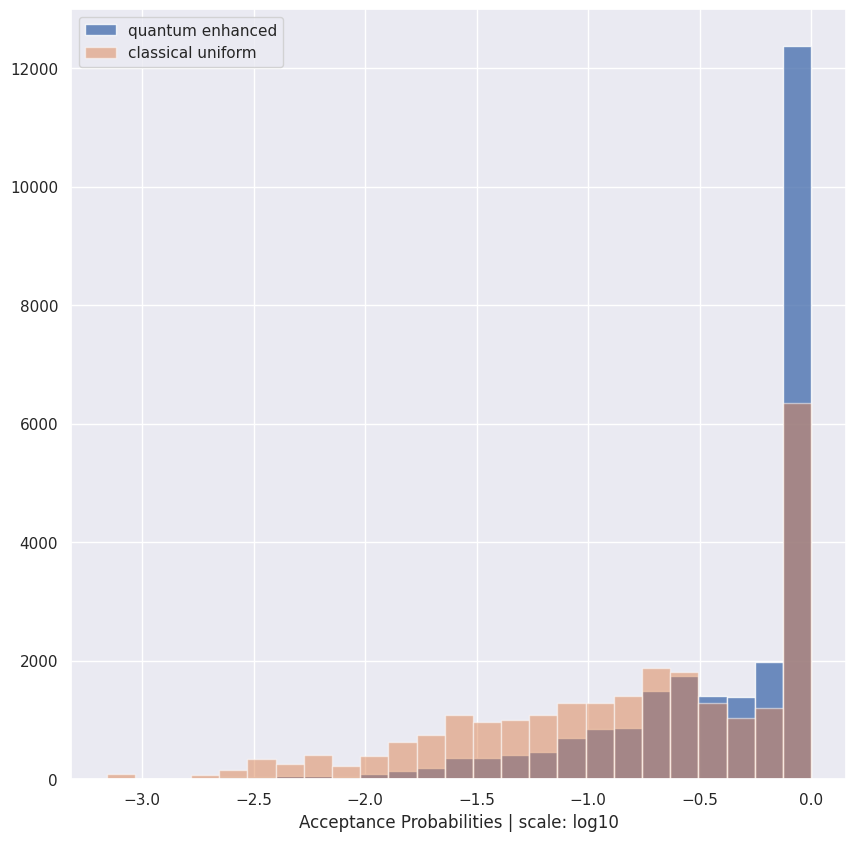

In [9]:
acceptance_prob_hist(DATA5, nspins=5)

### **10 Qubits**

In [10]:
DATA10 = pd.read_json('SamplingData/DATA_10qubit.json')

#### KL Div

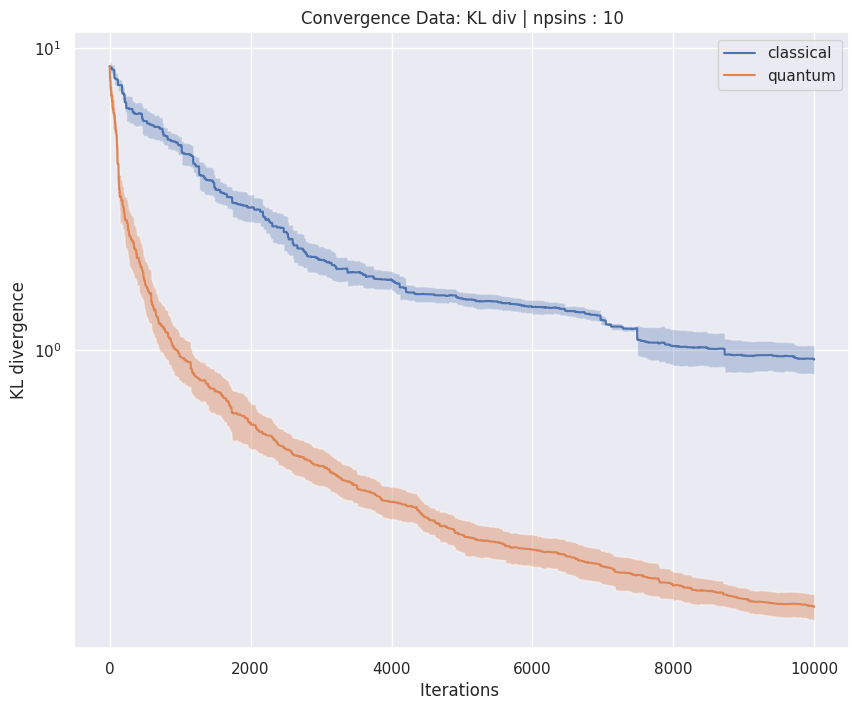

In [11]:
convergence_data_plot(DATA10, to_check= 'kldiv', nspins=10)

100%|██████████| 5/5 [00:00<00:00, 5736.19it/s]


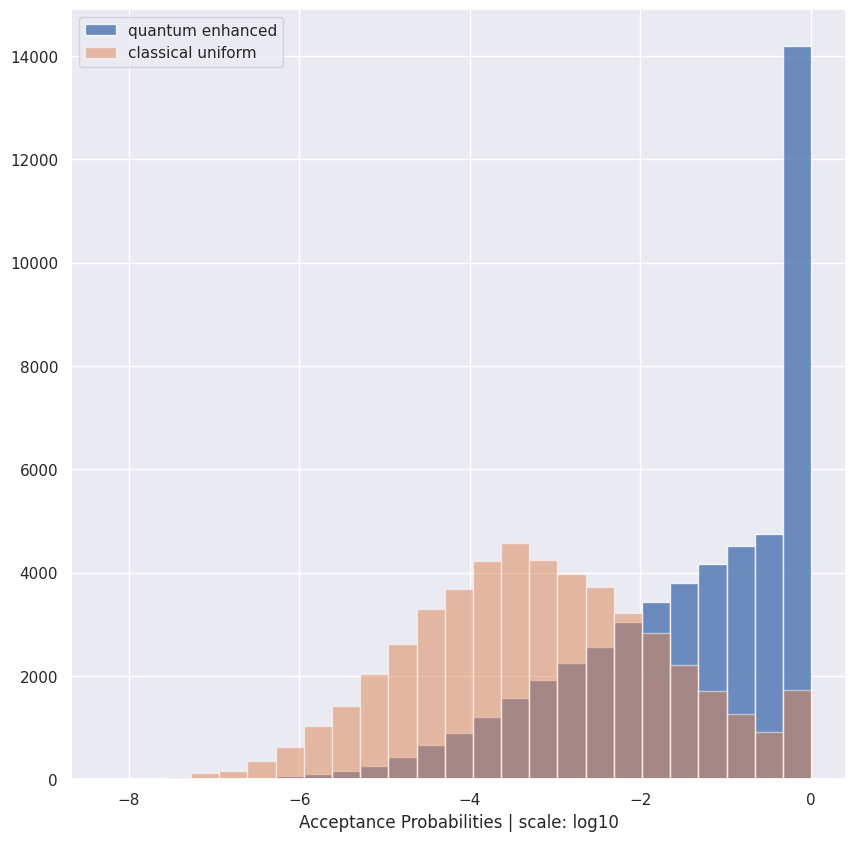

In [12]:
acceptance_prob_hist(DATA10, 10)

### **15 Qubits**

In [13]:
DATA15 = pd.read_json('SamplingData/DATA_15qubit.json')

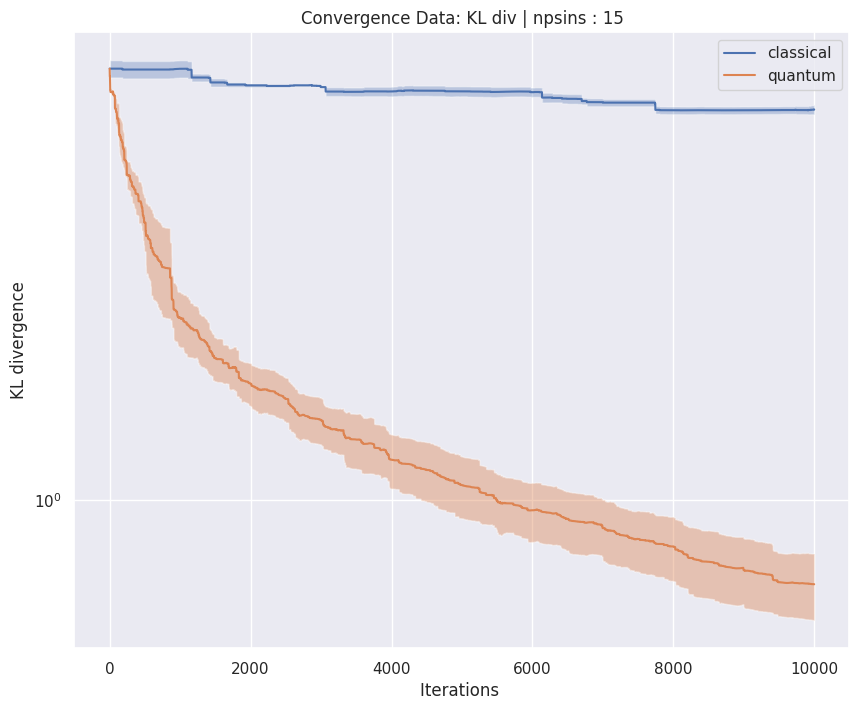

In [14]:
convergence_data_plot(DATA15, to_check= 'kldiv', nspins=15, init= 2)

100%|██████████| 3/3 [00:00<00:00, 4422.82it/s]


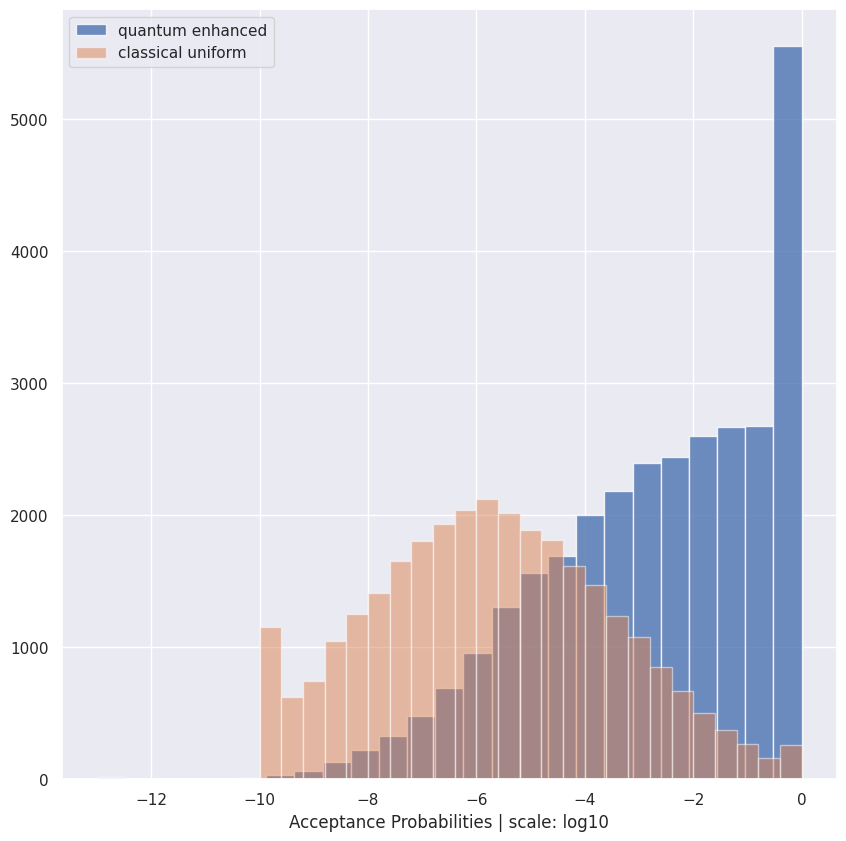

In [15]:
acceptance_prob_hist(DATA15, nspins= 15, init= 2)